In [75]:
import pandas as pd
import numpy as np
import re
%matplotlib inline
import matplotlib as plt

plt.style.use('ggplot')

def spaces_to_snake(colName):
    # convert string to snake_case
    s = re.sub(r"\s+",'_',colName)
    return s.lower()






In [6]:
#load dataset
df = pd.read_csv("/Users/mattburg/Downloads/Building_Violations.csv")
df.columns = [spaces_to_snake(eachCol) for eachCol in df.columns]



NameError: name 'spaces_to_snake' is not defined

In [25]:
df.violation_status.value_counts()

df[df.inspection_status == "PASSED"].violation_status.value_counts()

COMPLIED    176612
OPEN          4770
NO ENTRY         1
dtype: int64

In [50]:
#analyze data

subset  = df[(df.inspection_status == 'PASSED') & (df.violation_status == "OPEN")]

sub

df.desc


#subset.iloc[:,0:20].value_counts()

#subset.iloc[:,0:20].head(100)


,id,inspection_number,property_group,latitude,longitude
count,1407849.000000,1407849.000000,1407849.000000,1406624.000000,1406624.000000
mean,3293062.503180,6171214.206898,198430.185813,41.845213,-87.673148
std,1088501.242955,4294537.098315,183646.613849,0.087452,0.057040
min,219970.000000,132673.000000,1000.000000,41.644692,-87.914436
25%,2387323.000000,2017458.000000,20553.000000,41.771124,-87.714088
50%,3407782.000000,2807743.000000,145596.000000,41.853545,-87.670252
75%,4216293.000000,10626062.000000,365080.000000,41.912448,-87.634255
max,5066110.000000,11598090.000000,664052.000000,42.022686,-87.524679


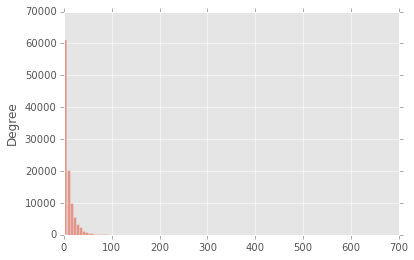

In [77]:
#plotting distribution of number of building violations by building property_group


df = df[ (df.inspection_status == "PASSED") | (df.inspection_status == "FAILED")];

df["ind_pf"] = df.inspection_status == "FAILED";

df['ind_pf'].astype(int);

df.ind_pf.value_counts()

building_groups = df.groupby('property_group')

building_groups = building_groups.aggregate(np.sum)

building_groups['ind_pf'].plot(kind='hist', alpha=0.5,bins=100,)



